In [1]:
cd /data/store01/data_dirs/students/ucfafyi/Sentinel

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline
import sys
sys.path.append ( "..")
import gp_emulator
sys.path.insert(0,'python')
from fastRWpkl import *
from scipy import interpolate
from nicer_plot import *
from readSent import *
import pandas as pd
from Py6S import *
from multiprocessing import *
from Dload_Finder import *
from scipy import optimize
from sklearn import linear_model
from matplotlib import gridspec
from scipy.stats import gaussian_kde
from matplotlib import cm, colors
import scipy
from applied import *
from glob import glob
import mgrs

In [ ]:
lat, lon, year = 37.181944, 114.36, 2016
sfiles, mfiles = get_closet(lat, lon,year,0)

keys = 'B02', 'B03','B04','B08','B8A','B11','B12'
bands = [2,3,4,8,13,11,12]

for i in [8, 11, 15, 17]:
    print sfiles[i],'\n', mfiles[i], '\n'

In [19]:
import sys
sys.path.insert(0, 'python')
from optimizing import *
lat, lon = 37.181944, 114.36
mfile = [ '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A1.A2016177.h27v05.005.2016194191852.hdf',
 '/home/ucfafyi/DATA/Sentinel/m_data/MCD43A2.A2016177.h27v05.005.2016194191852.hdf']
sfile = '/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/6/22/0/'

In [20]:
psfs = parallel_rw_pkl(None, 'l177l', 'r')
psfs = np.array([i[1][0] for i in psfs])
to_regs = applied( 37.181944, 114.36,sfile, mfile, psfs)


Here is the cloud probability calculation!

/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/6/22/0/ (2, 3, 4, 8, 11, 12, 13)
7%
14%
21%
29%
36%
43%
50%
57%
64%
71%
79%
86%
93%
99%
Done!!!
DOY:  177 
Location:  50SKG
Cloud proportion:  0.0275840574517


In [25]:
data =[i[1:] for i in to_regs]

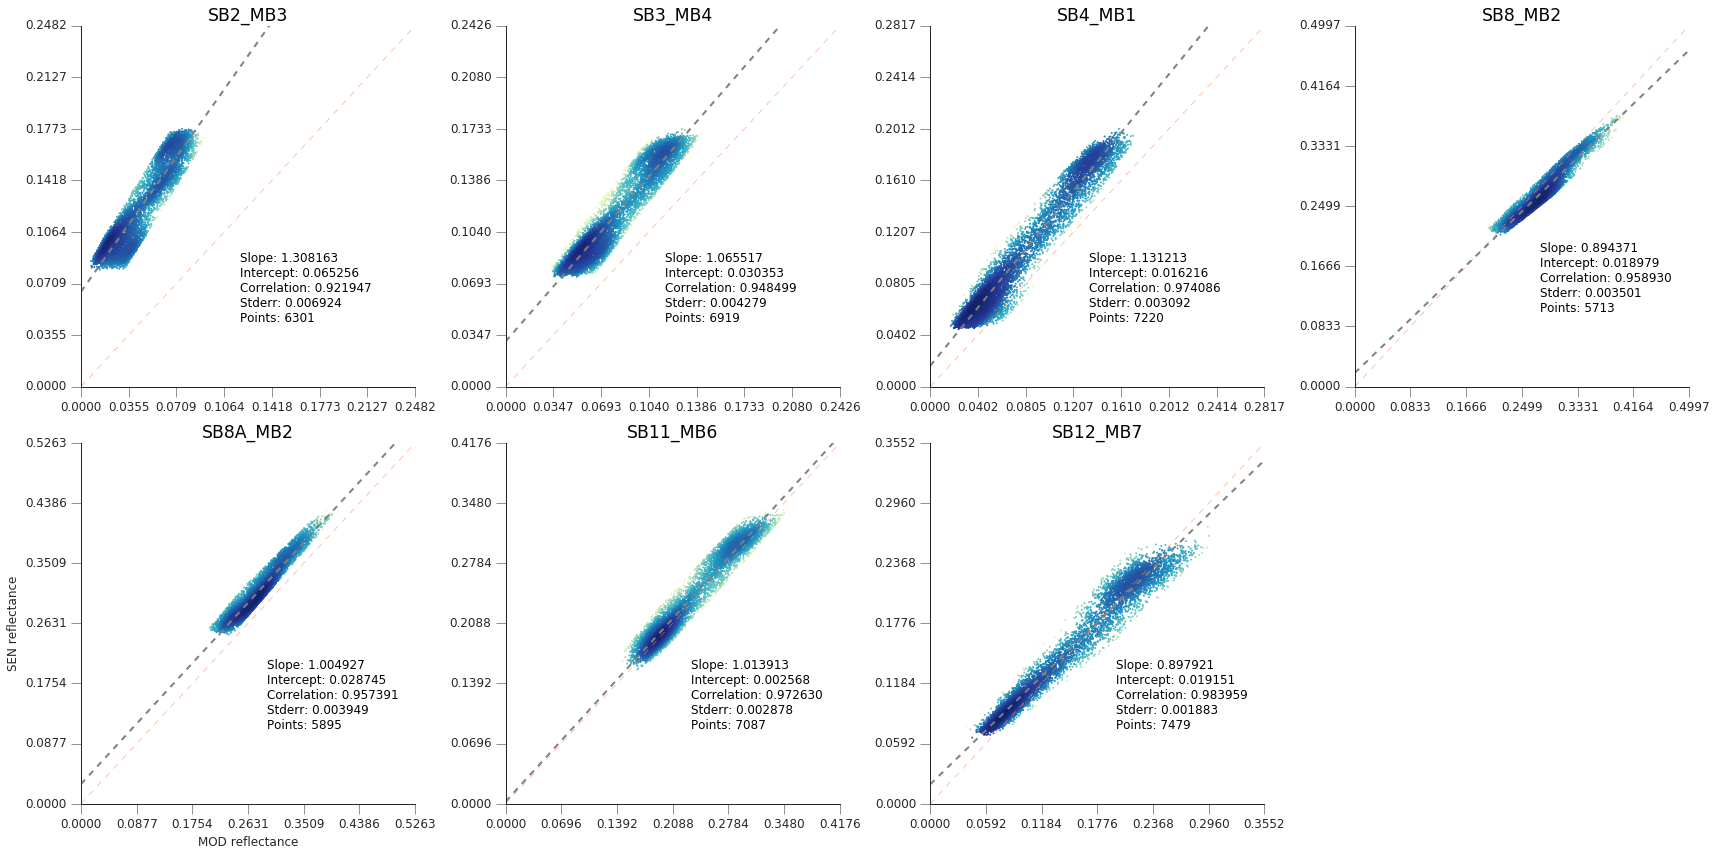

In [73]:
plot_config()
fig = plt.figure()
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(24,12))
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8A_MB2,SB11_MB6,SB12_MB7').split(',')
cmap = cm.get_cmap('YlGnBu')
psfsolve = []
for i in range(7):
    ax = fig.add_subplot(gs[i])
    x,y = data[i]
    
    mod, sen = ransaclin(x,y)    
    
    s = sen.ravel()
    m = mod.ravel()
    mval = np.nanmax([s,m])
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='',norm=colors.LogNorm(vmin=z.min(), vmax=z.max()*1.2), cmap = cmap)
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    slope,inter, rval, pval, std = r = scipy.stats.linregress(m,s)
    ax.set_title('%s'%names[i])
    ax.text(mval*(4./6.),mval*(1.5/6.),'Slope: %02f \nIntercept: %02f \nCorrelation: %02f \nStderr: %02f \nPoints: %s'%(slope,inter, rval, std, len(m)), 
        )
    pretty_axes(ax)
    ax.set_xlim(0,mval)
    ax.set_ylim(0,mval)
    ax.set_yticks(np.arange(0,mval+0.1,mval/5.))
    ax.set_xticks(np.arange(0,mval+0.1,mval/5.))
    if i==4:
        ax.set_xlabel ( "MOD reflectance")
        ax.set_ylabel ( "SEN reflectance")
    psfsolve.append([slope,inter])
plt.tight_layout()

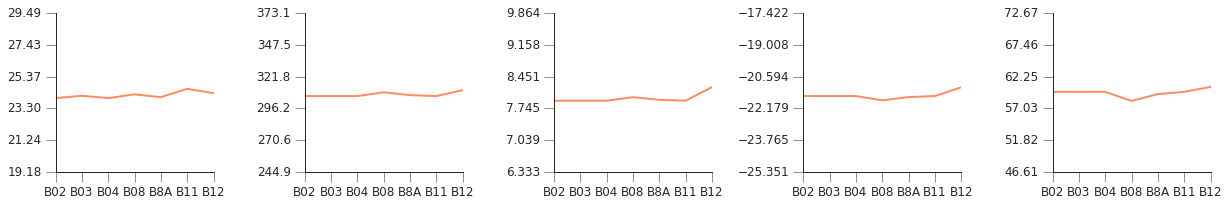

In [71]:
names = ['B02', 'B03', 'B04', 'B08', 'B8A', 'B11', 'B12']
fig = plt.figure(figsize=(24,3))
for i in range(5):
    ax = fig.add_subplot(1,7,i+1)
    ax.plot(psfs[:,i])
    pretty_axes(ax)
    ax.set_yticks(np.linspace(0.8*min(psfs[:,i]), 1.2*max(psfs[:,i]), 6))
    ax.set_xticklabels(names)        
plt.tight_layout()

In [4]:
#'/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/4/13/0/' band 8 and 8a 
psf1 = [[  24.36886168,  315.03053527,    7.77392972,  -21.0502866 , 61.18454871],
[  24.68623805,  309.80447572,    7.86022382,  -21.76205015, 59.55291682],
[  24.08723711,  322.71775518,    8.64492575,  -23.23041705, 46.74852059],
[  23.97447188,  306.15258185,    7.91598097,  -21.56165644, 59.7537709 ],
[  23.97447188,  306.15258185,    7.91598097,  -21.56165644, 59.7537709 ],
[  23.46575844,  308.2245081 ,    8.19646263,  -21.8287188 , 60.11852882],
[  24.28384179,  322.78181376,    7.76713956,  -21.53229647, 60.63163038]]

In [5]:
#'/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/5/3/0/' band 4 and band 11
psf2 = [[  24.78162257,  319.75603031,    7.60898016,  -20.44817067, 61.27414215],
[  24.98695115,  312.02695267,    7.9308606 ,  -21.20931201, 59.01870048],
[  23.97447645,  306.15258185,    7.91598097,  -21.56165644, 59.7537709 ],
[  24.41782056,  306.04039495,    7.97986228,  -22.27513358, 59.27710844],
[  24.41736189,  308.74673509,    7.87068097,  -21.64732953, 61.26454941],
[  23.97447188,  306.15258185,    7.91598248,  -21.56165644, 59.7537709 ],
[  24.02092481,  304.79130493,    8.01491173,  -20.96258739, 59.98666719]]

In [6]:
#'/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/6/12/0/' band8 and band 8a
psf3=[[  23.00975645,  314.37685229,    7.7487488 ,  -22.14214751, 61.35843349],
[  24.11414863,  308.0964314 ,    8.10627265,  -21.90611234, 59.04714238],
[  24.24821063,  310.55435643,    8.00542245,  -21.80044518, 59.38044005],
[  23.97447188,  306.15258185,    7.91598097,  -21.83117715, 59.7537709 ],
[  23.97447188,  306.15258185,    7.91598097,  -21.56165644, 59.7537709 ],
[  24.45455354,  312.33095678,    8.07252733,  -21.99192561, 56.75753612],
[  23.40677194,  305.39098872,    7.94483259,  -22.5595651 , 60.40613826]]

In [7]:
#'/home/ucfafyi/DATA/Sentinel/s_data/50/S/KG/2016/6/22/0/'
psf4=[[  23.97447188,  306.15258185,    7.91598097,  -21.56165644, 59.75386208],
[  23.97447188,  306.39176355,    7.91598097,  -21.57850148, 59.7537709 ],
[  23.97447554,  306.15262857,    7.91598218,  -21.56165973, 59.75381649],
[  24.2142309 ,  309.21424837,    7.99514462,  -21.77724793, 58.25992256],
[  24.00341732,  321.12718792,    7.91935393,  -21.56667077, 59.74308995],
[  24.05748349,  306.33244649,    8.26992427,  -21.5468328 , 59.8112839 ],
[  24.84714265,  317.29653584,    8.20412268,  -21.00105338, 57.74604419]]

In [9]:
psfs = np.array([psf1, psf2,psf3,psf4])

In [13]:
psfs.shape

(4, 7, 5)

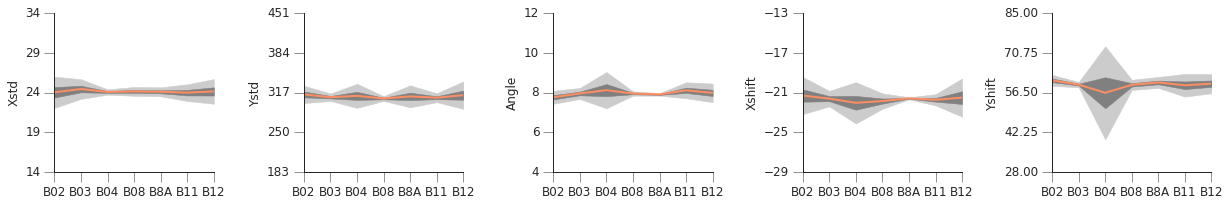

In [34]:
names = ['B02', 'B03', 'B04', 'B08', 'B8A', 'B11', 'B12']
ylabels = ['Xstd', 'Ystd', 'Angle', 'Xshift', 'Yshift']
plot_config()
fig = plt.figure(figsize=(24,3))
mean = np.mean(psfs, axis=0)
std = np.std(psfs, axis=0)
for i in range(5):
    ax = fig.add_subplot(1,7,i+1)
    ax.plot(mean[:,i])
    ax.fill_between(range(7), mean[:,i]-3*std[:,i],mean[:,i]+3*std[:,i], color='0.8')
    ax.fill_between(range(7), mean[:,i]-std[:,i],mean[:,i]+std[:,i], color='0.5') 
    pretty_axes(ax)
    ax.set_yticks(np.linspace(int(0.6*min(data[:,i])), int(1.4*max(data[:,i])), 5))
    ax.set_xticklabels(names)
    ax.set_ylabel(ylabels[i])
plt.tight_layout()

In [20]:
mean = np.mean(psfs, axis=(0,1))
std = np.std(psfs, axis=(0,1))

In [6]:
psfpkls = glob('pkls/pre_psfs/*psfs00*')

In [7]:
sol_psfs = {}
for i in [i[5:-6] for i in psfpkls]:
    data = parallel_rw_pkl(None, i, 'r')
    sol_psfs[i] = data

In [9]:
Ks = ['16TCK129','16TCK169', '21MTT177', '21MTT201', '30UXC161', '32PMA17', '32PMA25', '32PMA41', '32PMA65', '36MXE145', '36MXE161', '36MXE49', '36MXE9', '47QQD41']

In [11]:
selected = {ii: sol_psfs[ii] for ii in ['pre_psfs/'+i+'psfs' for i in Ks]}

In [12]:
sepsf = np.array([j[1][0] for i in selected.values() for j in i]).reshape((14,7,5))

In [19]:
alpsf = np.vstack((psfs, sepsf))

/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


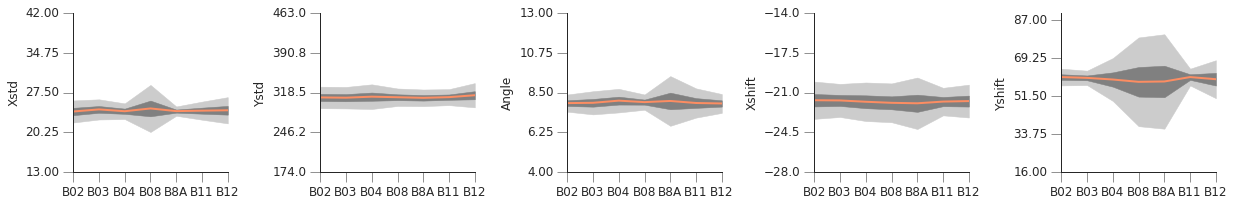

In [20]:
names = ['B02', 'B03', 'B04', 'B08', 'B8A', 'B11', 'B12']
ylabels = ['Xstd', 'Ystd', 'Angle', 'Xshift', 'Yshift']
plot_config()
fig = plt.figure(figsize=(24,3))
mean = np.mean(alpsf, axis=0)
std = np.std(alpsf, axis=0)
for i in range(5):
    ax = fig.add_subplot(1,7,i+1)
    ax.plot(mean[:,i])
    ax.fill_between(range(7), mean[:,i]-3*std[:,i],mean[:,i]+3*std[:,i], color='0.8')
    ax.fill_between(range(7), mean[:,i]-std[:,i],mean[:,i]+std[:,i], color='0.5') 
    pretty_axes(ax)
    ax.set_yticks(np.linspace((int(0.6*alpsf[:,:,i].min())), int(1.4*alpsf[:,:,i].max()), 5))
    ax.set_xticklabels(names)
    ax.set_ylabel(ylabels[i])
plt.tight_layout()

In [21]:
meanpsf = np.mean(alpsf, axis=(0,1))
meanpsf

array([  24.23615633,  310.30385673,    7.94572695,  -21.80052186,
         59.25006585])

In [22]:
selected['pre_psfs/16TCK169psfs']

[[2, (array([  21.8979267 ,  313.5947878 ,    8.16924372,  -22.2731211 ,
            60.99709537]), 0.088676469785746725, 366, 1000, 1)],
 [3, (array([  23.97447188,  306.15258185,    7.91598097,  -22.10069785,
            59.7537709 ]), 0.084258841863306122, 372, 1001, 1)],
 [4, (array([  23.95195705,  315.37358567,    8.00233081,  -21.44711859,
            60.04492094]), 0.074901440459015811, 381, 1002, 1)],
 [8, (array([  23.89925313,  310.30061318,    7.86032165,  -21.85237207,
            59.43882569]), 0.77209456532548659, 372, 1003, 1)],
 [13, (array([  24.31077069,  310.43492206,    7.74989904,  -22.40145616,
            59.15721254]), 0.75587921510509404, 354, 1000, 1)],
 [11, (array([  25.15919438,  303.34087654,    7.97582579,  -22.08810584,
            59.77862847]), 0.67954142905097503, 378, 1002, 1)],
 [12, (array([  24.14144468,  316.0033913 ,    8.06927399,  -21.33367523,
            59.44843406]), 0.071423015996056605, 362, 1000, 1)]]

In [116]:
tx = mgrs.MGRS()